In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from mpl_toolkits import mplot3d
from datetime import datetime, timedelta
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
import geopandas as gpd

In [34]:
data = pd.read_csv("Food_Inspections.csv")
df = data.copy()

In [35]:
df.drop(["Inspection ID","State","City","AKA Name"],axis = 1,inplace = True)

In [36]:
df['DBA Name'] = df['DBA Name'].str.upper()
df['DBA Name'] = df['DBA Name'].str.replace("'","")
df['Facility Type'] = df['Facility Type'].str.upper()
df['Inspection Type'] = df['Inspection Type'].str.upper()
df.index = np.arange(1,len(df)+1)

C:\Users\GuestPC\AppData\Local\Temp\ipykernel_500\3822779279.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df["Longitude"], df["Latitude"],c = "black",cmap='viridis', s=5)


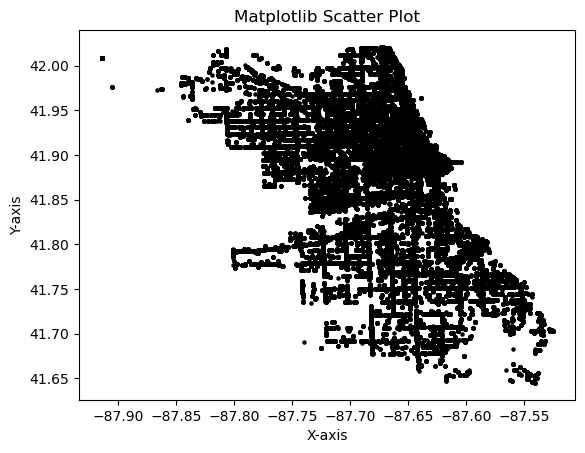

In [37]:
df.Results = df.Results[(df.Results != "Not Ready")] 
df.Results = df.Results[(df.Results != "No Entry")] 
df.Results = df.Results[(df.Results != "Out of Business")] 
df.Results = df.Results[(df.Results != "Business Not Located")]
df.Results = df.Results[(df.Results != "Pass w/ Conditions")]
feature_3 = [100, 200, 150]

plt.scatter(df["Longitude"], df["Latitude"],c = "black",cmap='viridis', s=5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
# plt.colorbar(label=df.Results)
plt.title('Matplotlib Scatter Plot')
plt.show()



<Axes: >

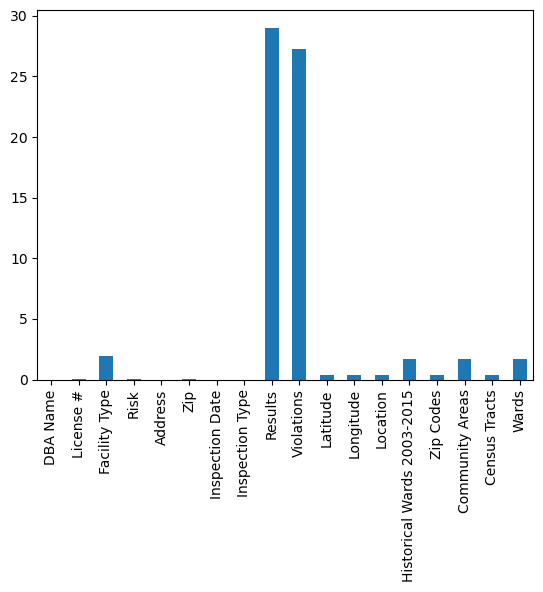

In [38]:
((df.isna().sum()/len(df)) * 100).plot.bar()

In [39]:
df.drop(columns=["Latitude","Longitude","Location"],axis=0,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256789 entries, 1 to 256789
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   DBA Name                    256789 non-null  object 
 1   License #                   256781 non-null  float64
 2   Facility Type               251715 non-null  object 
 3   Risk                        256710 non-null  object 
 4   Address                     256789 non-null  object 
 5   Zip                         256704 non-null  float64
 6   Inspection Date             256789 non-null  object 
 7   Inspection Type             256788 non-null  object 
 8   Results                     182267 non-null  object 
 9   Violations                  186733 non-null  object 
 10  Historical Wards 2003-2015  252432 non-null  float64
 11  Zip Codes                   255911 non-null  float64
 12  Community Areas             252432 non-null  float64
 13  Census Tracts 

In [41]:
df.Results = df.Results[(df.Results != "Not Ready")] 
df.Results = df.Results[(df.Results != "No Entry")] 
df.Results = df.Results[(df.Results != "Out of Business")] 
df.Results = df.Results[(df.Results != "Business Not Located")]
df.Results = df.Results[(df.Results != "Pass w/ Conditions")]
df.Results.value_counts()

Pass    132299
Fail     49968
Name: Results, dtype: int64

In [42]:
df.Risk = df.Risk[(df.Risk != "All")]

<Axes: xlabel='Risk', ylabel='count'>

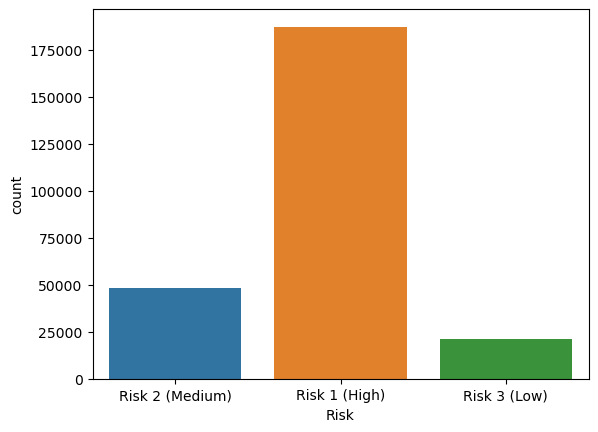

In [43]:
sns.countplot(data = df, x=df['Risk'])
# plt.yscale("log")

<Axes: xlabel='Results', ylabel='count'>

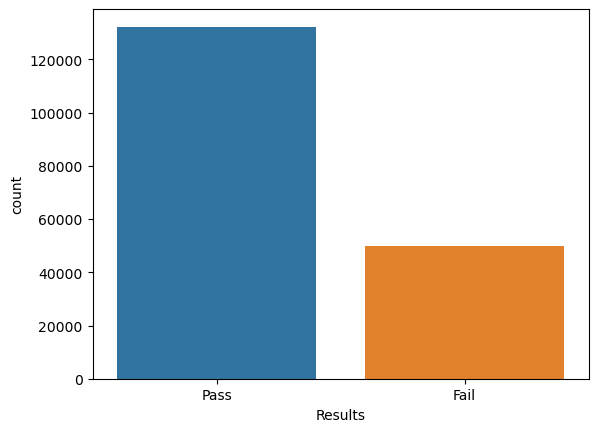

In [44]:
sns.countplot(data = df, x='Results')
# plt.yscale("log")

<Axes: xlabel='Risk', ylabel='count'>

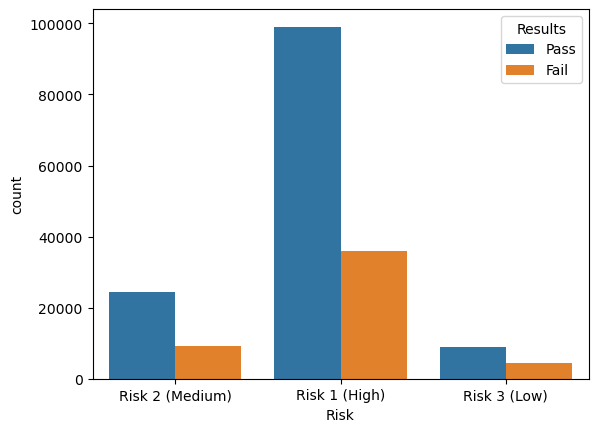

In [45]:
sns.countplot(data, x=df["Risk"], hue=df["Results"])
# plt.yscale("log")

In [46]:
df.describe()

,License #,Zip,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
count,2.567810e+05,256704.000000,252432.000000,255911.000000,252432.000000,255873.000000,252432.000000
mean,1.703330e+06,60628.758625,27.518868,17997.235144,37.487105,375.204023,26.939584
std,9.222199e+05,149.300163,14.519883,6275.744133,19.226374,244.149940,13.713109
min,0.000000e+00,10014.000000,1.000000,4299.000000,1.000000,1.000000,1.000000
25%,1.331472e+06,60614.000000,16.000000,14920.000000,24.000000,148.000000,16.000000
50%,2.037673e+06,60625.000000,25.000000,21538.000000,36.000000,359.000000,27.000000
75%,2.354772e+06,60643.000000,41.000000,22216.000000,55.000000,598.000000,37.000000
max,9.999999e+06,90504.000000,53.000000,26633.000000,77.000000,801.000000,50.000000


In [47]:
df.fillna(method="bfill",inplace=True)

In [48]:
enc = OneHotEncoder()
feature_arr = enc.fit_transform(df[["Risk"]]).toarray()
feature_labels = enc.categories_
feature_labels = np.array(feature_labels).ravel()
features = pd.DataFrame(feature_arr, columns = feature_labels)
df = df.join(features)


In [49]:
df["Facility Type"].value_counts()

RESTAURANT                      175629
GROCERY STORE                    33051
SCHOOL                           16494
CHILDREN'S SERVICES FACILITY      5300
BAKERY                            3794
                                 ...  
GIFT SHOP                            1
HERBAL STORE                         1
TAVERN/1006                          1
CHICAGO PARK DISTRICT                1
KIDS CAFE'                           1
Name: Facility Type, Length: 458, dtype: int64

In [50]:
df["Facility Type"] = df["Facility Type"][((df["Facility Type"] == "RESTAURANT") | (df["Facility Type"] == "GROCERY STORE") | (df["Facility Type"] == "SCHOOL"))]
df["Facility Type"].value_counts() 

RESTAURANT       175629
GROCERY STORE     33051
SCHOOL            16494
Name: Facility Type, dtype: int64

In [51]:
no_numerical = df[["DBA Name","Address","Inspection Type"]]
numerical = df[["Historical Wards 2003-2015","Zip Codes","Community Areas","Census Tracts","Wards","Risk 1 (High)","Risk 2 (Medium)","Risk 3 (Low)"]]


In [52]:
numerical.isna().sum()

Historical Wards 2003-2015    0
Zip Codes                     0
Community Areas               0
Census Tracts                 0
Wards                         0
Risk 1 (High)                 1
Risk 2 (Medium)               1
Risk 3 (Low)                  1
dtype: int64

In [53]:
numerical = numerical.join(pd.get_dummies(df["Facility Type"]))
X = numerical
y = df.Results

In [54]:
def no_outlier_data(data):
    q3 = data.quantile(0.75)
    q1 = data.quantile(0.25)
    iqr = q3 - q1
    lower = q1 - (iqr * 1.5)
    higher = q3 + (iqr * 1.5)
    new_data = data[(data >= lower) & (data <= higher)]
    return new_data

In [55]:
#y = pd.get_dummies(df["Results"])  # Target variable
#X = df.drop(["Results"], axis=1)  # Features (all columns except the target)

#X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [56]:
X.fillna(method="pad",inplace=True)
X.isna().sum()

Historical Wards 2003-2015    0
Zip Codes                     0
Community Areas               0
Census Tracts                 0
Wards                         0
Risk 1 (High)                 0
Risk 2 (Medium)               0
Risk 3 (Low)                  0
GROCERY STORE                 0
RESTAURANT                    0
SCHOOL                        0
dtype: int64

In [57]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [58]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_imputed, y_train)

DecisionTreeClassifier(random_state=42)

In [59]:
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.6928424004050002
              precision    recall  f1-score   support

        Fail       0.30      0.05      0.09     14675
        Pass       0.71      0.95      0.82     36683

    accuracy                           0.69     51358
   macro avg       0.51      0.50      0.45     51358
weighted avg       0.60      0.69      0.61     51358



In [60]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6991705284473695
              precision    recall  f1-score   support

        Fail       0.30      0.04      0.07     14675
        Pass       0.71      0.96      0.82     36683

    accuracy                           0.70     51358
   macro avg       0.51      0.50      0.44     51358
weighted avg       0.59      0.70      0.61     51358



In [62]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)
bagging.fit(X_train_imputed, y_train)

C:\Users\GuestPC\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [63]:
y_pred_bagging = bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Accuracy:", accuracy_bagging)
print(classification_report(y_test, y_pred_bagging))

Bagging Accuracy: 0.6980412009813466
              precision    recall  f1-score   support

        Fail       0.30      0.04      0.08     14675
        Pass       0.71      0.96      0.82     36683

    accuracy                           0.70     51358
   macro avg       0.51      0.50      0.45     51358
weighted avg       0.60      0.70      0.61     51358



In [90]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train_imputed, y_train)

KNeighborsClassifier(n_neighbors=50)

In [91]:
y_pred = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy_knn)
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.7122746212858756
              precision    recall  f1-score   support

        Fail       0.35      0.01      0.02     14675
        Pass       0.71      0.99      0.83     36683

    accuracy                           0.71     51358
   macro avg       0.53      0.50      0.42     51358
weighted avg       0.61      0.71      0.60     51358

